Here we will downlaod all the library and package that need in this project

In [85]:
import pandas as pd
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [71]:
loan_raw_df = pd.read_csv('../Data files/loan_approval_dataset.csv')

In [72]:
loan_raw_df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [73]:
loan_raw_df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

We can see that columns have some space in their name which is not convenient to use . So we will strip the space in columns name

In [74]:
 loan_raw_df.columns = loan_raw_df.columns.str.strip()

In [75]:
 loan_raw_df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

Now there is no space in column name 

After careful observation I have found that the value in columns education , self_employed and loan_status have space that need to strip as well

In [76]:
loan_raw_df['education'] = loan_raw_df['education'].str.strip()

In [77]:
loan_raw_df['self_employed'] = loan_raw_df['self_employed'].str.strip()

In [78]:
loan_raw_df['loan_status'] = loan_raw_df['loan_status'].str.strip()

Machine learning algorithms are good at handing categorical data in string format so we need to replace it with numerical values.

In [79]:
loan_raw_df['education'] = loan_raw_df['education'].map({
    'Not Graduate':0,'Graduate':1
})

In [80]:
  loan_raw_df['self_employed'] = loan_raw_df['self_employed'].map({
    'Yes':1 , 'No': 0
})

In [81]:
loan_raw_df['loan_status'] = loan_raw_df['loan_status'].map({
    'Approved':1 , 'Rejected': 0
})

In [82]:
loan_raw_df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


##### 

In [86]:
loan_raw_df.corr()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,1.000000,0.005326,0.015536,0.001745,0.012592,0.008170,0.009809,0.016323,0.020936,0.018595,-0.000862,0.010765,0.017685
no_of_dependents,0.005326,1.000000,0.002697,0.000765,0.007266,-0.003366,-0.020111,-0.009998,0.007376,-0.001531,0.002817,0.011163,-0.018114
education,0.015536,0.002697,1.000000,-0.023224,0.011625,0.010631,-0.008417,-0.004649,0.010930,-0.006763,0.012471,0.009424,0.004918
self_employed,0.001745,0.000765,-0.023224,1.000000,0.002368,0.001450,0.004107,-0.004866,0.006144,-0.017998,0.004413,-0.000215,0.000345
income_annum,0.012592,0.007266,0.011625,0.002368,1.000000,0.927470,0.011488,-0.023034,0.636841,0.640328,0.929145,0.851093,-0.015189
loan_amount,0.008170,-0.003366,0.010631,0.001450,0.927470,1.000000,0.008437,-0.017035,0.594596,0.603188,0.860914,0.788122,0.016150
loan_term,0.009809,-0.020111,-0.008417,0.004107,0.011488,0.008437,1.000000,0.007810,0.008016,-0.005478,0.012490,0.017177,-0.113036
cibil_score,0.016323,-0.009998,-0.004649,-0.004866,-0.023034,-0.017035,0.007810,1.000000,-0.019947,-0.003769,-0.028618,-0.015478,0.770518
residential_assets_value,0.020936,0.007376,0.010930,0.006144,0.636841,0.594596,0.008016,-0.019947,1.000000,0.414786,0.590932,0.527418,-0.014367
commercial_assets_value,0.018595,-0.001531,-0.006763,-0.017998,0.640328,0.603188,-0.005478,-0.003769,0.414786,1.000000,0.591128,0.548576,0.008246


The cibil_score has high correlation with loan_status , we we will select cibil_score as feautee, previously I had use other features as well but the accuracy score was not high as we get when use only cibil_score.

<AxesSubplot:>

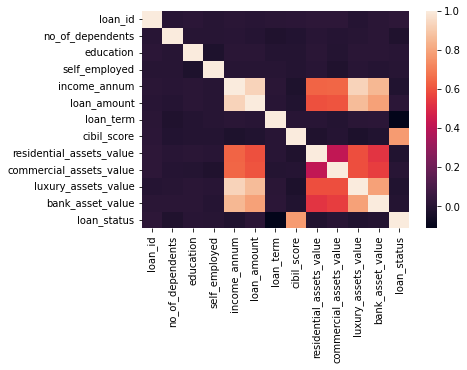

In [87]:
sns.heatmap(loan_raw_df.corr())

In [88]:
features =  np.array(loan_raw_df['cibil_score'].values.tolist())

In [89]:
target = np.array(loan_raw_df['loan_status'].values.tolist())

In [90]:
x_train, X_test,y_train,y_test  = train_test_split(loan_features,target,test_size=0.33, random_state=42)

In [97]:
x_train = x_train.reshape(-1,1)
X_test=  X_test.reshape(-1,1) 

In [98]:
model = svm.SVC()

In [99]:
model.fit(x_train,y_train)

SVC()

In [100]:
pred = model.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score

In [101]:
accuracy_score(y_test, pred)

0.9510290986515259

With cibil_score as feature we have achived pretty good accuracy of 95.10 %.